In [1]:
%load_ext autoreload
%autoreload 2

import ncem

usr = !echo $USER
datadir = '.'

# Load data

In [2]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_origin='schuerch',
    data_path=datadir + 'schuerch/',
    radius=60,
    node_label_space_id='type',
    node_feature_space_id='standard',
    merge_node_types_predefined=True
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Loading data from raw files
registering celldata
collecting image-wise celldata


  6%|▋         | 9/140 [00:00<00:01, 88.37it/s]

adding graph-level covariates


100%|██████████| 140/140 [00:01<00:00, 74.91it/s]


Loaded 140 images with complete data from 35 patients over 258385 cells with 57 cell features and 21 distinct celltypes.
Mean of mean node degree per images across images: 10.311835

 Celldata metadata: {'lateral_resolution': 0.377442, 'fn': 'CRC_clusters_neighborhoods_markers_NEW.csv', 'image_col': 'File Name', 'pos_cols': ['X:X', 'Y:Y'], 'cluster_col': 'ClusterName', 'cluster_col_preprocessed': 'ClusterName_preprocessed', 'patient_col': 'patients'}


# Supp. Fig. 1: Cell-type centric summary statistics in CODEX - cancer dataset. 

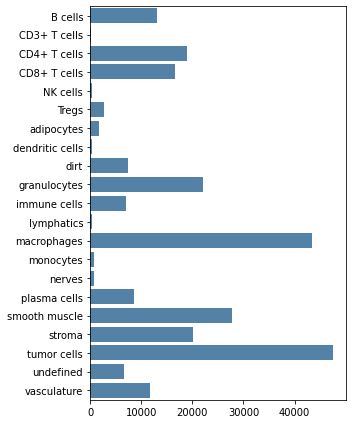

In [3]:
interpreter.data.celltype_frequencies()

0.0
2.56106902346913
3.42377817573414
8.151810911740514
40.28233341422723
154.010672671401
505.6835192555206
1845.519572674249


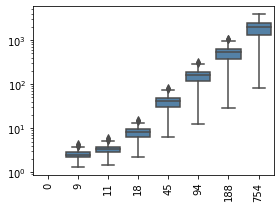

In [4]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 25, 30, 50, 120, 250, 500, 2000],
    lateral_resolution=0.377442,
)

# Supp. Fig. 2: Variance decomposition in CODEX - cancer dataset.

100%|██████████| 140/140 [02:29<00:00,  1.07s/it]


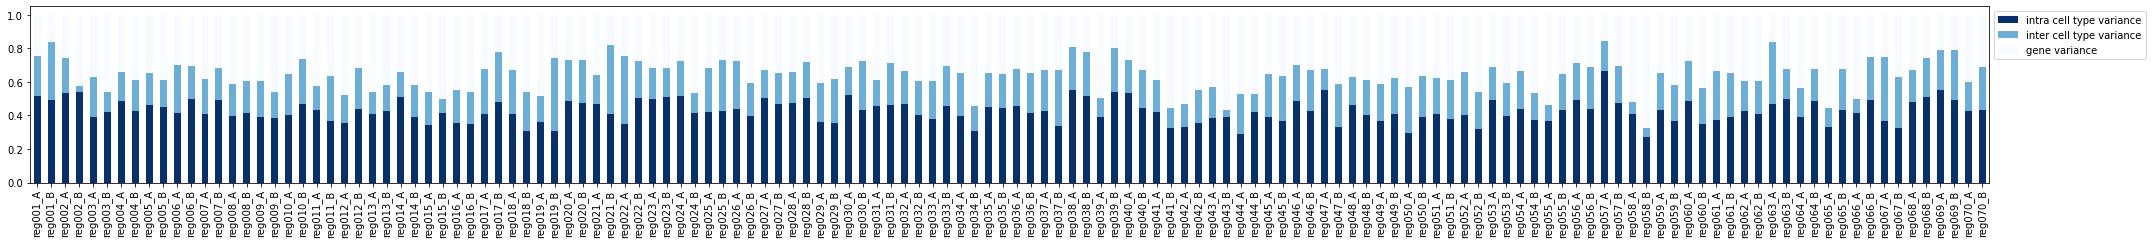

In [5]:
var_decomp = interpreter.data.compute_variance_decomposition(undefined_type='undefined')
interpreter.data.variance_decomposition(
    var_decomp, 
    figsize=(30, 3.5),
)

In [6]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.426698
inter cell type variance    0.212483
gene variance               0.360819
dtype: float32

# Supp. Fig. 6: Normalised contact frequencies of cell-types in spatial neighborhoods.

100%|██████████| 140/140 [00:25<00:00,  5.47it/s]


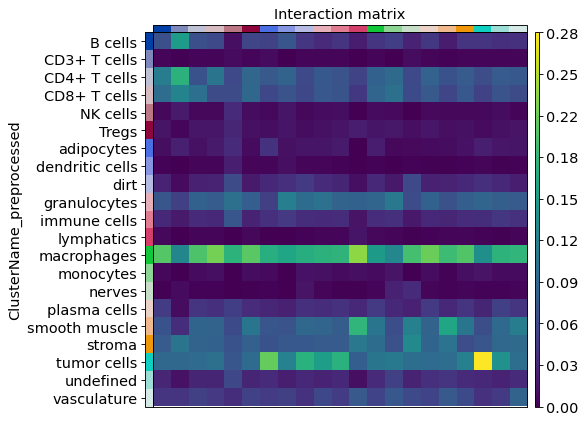

In [7]:
interpreter.data.celldata_interaction_matrix()

# Supp. Fig. 7: Ligand–receptor permutation test. 

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


n cells: 25226


  0%|          | 0/1000 [00:00<?, ?permutation/s]

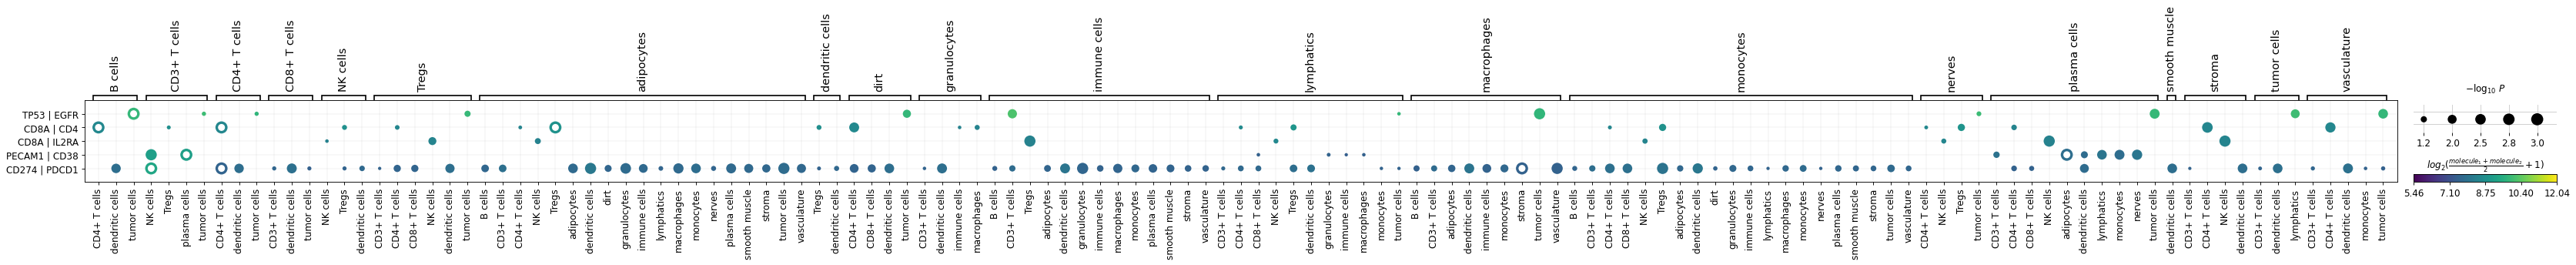

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [8]:
hgnc_names = [
    'CD44', 
    'FOXP3', 
    'CD8A', 'TP53', 
    'GATA3', 
    'PTPRC', 
    'TBX21', 
    'CTNNB1',
    'HLA-DR', 
    'CD274', 
    'MKI67', 
    'PTPRC', 
    'CD4', 
    'CR2', 
    'MUC1', 
    'TNFRSF8',
    'CD2', 
    'VIM', 
    'MS4A1', 
    'LAG3', 
    'ATP1A1', 
    'CD5', 
    'IDO1',
    'KRT1', 
    'ITGAM', 
    'NCAM1', 
    'ACTA1', 
    'BCL2', 
    'IL2RA', 
    'ITGAX',
    'PDCD1', 
    'GZMB', 
    'EGFR', 
    'VISTA', 
    'FUT4', 
    'ICOS', 
    'SYP',
    'GFAP', 
    'CD7', 
    'CD247', 
    'CHGA', 
    'CD163', 
    'PTPRC', 
    'CD68',
    'PECAM1', 
    'PDPN', 
    'CD34', 
    'CD38', 
    'SDC1', 
    'HOECHST1:Cyc_1_ch_1', ##
    'CDX2', 
    'COL6A1', 
    'CCR4', 
    'MMP9', 
    'TFRC', 
    'B3GAT1', 
    'MMP12'
]
adata = interpreter.data.ligrec(
    hgnc_names=hgnc_names,
    undefined_type='undefined',
    fraction=0.1,
)

# Supp. Fig. 13: Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

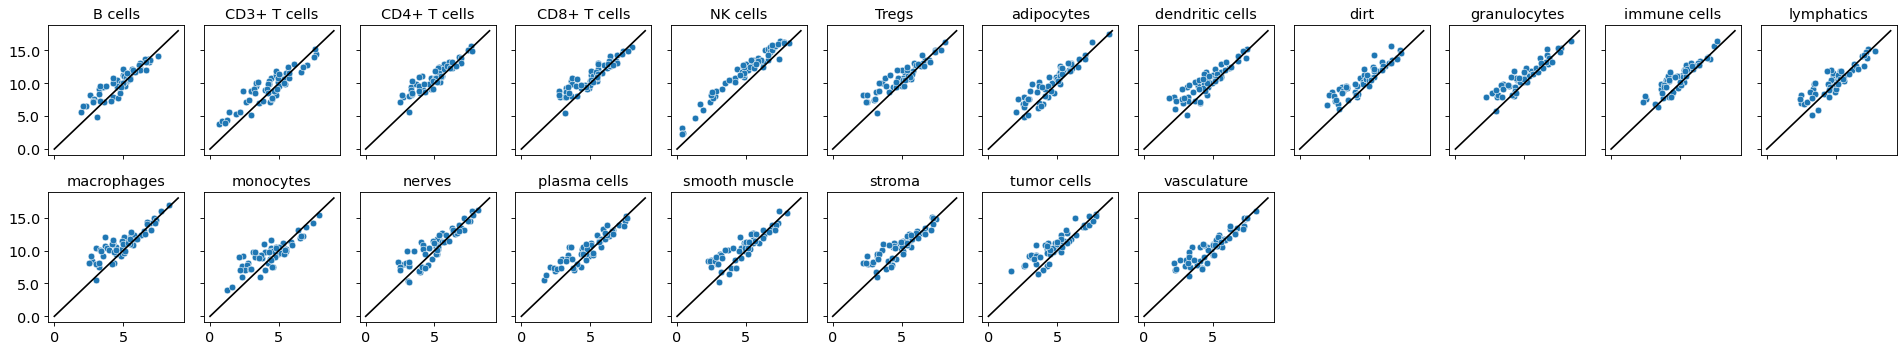

In [9]:
interpreter.data.noise_structure(
    undefined_type='undefined',
    min_x=0.0, max_x=9., 
)